In [1]:
%matplotlib notebook

In [90]:
import numpy as np
import os
import networkx as nx
import seaborn as sns


from numpy.linalg import eigh
from scipy import sparse as sp
from scipy.sparse import issparse
from matplotlib import pyplot as plt
from collections import defaultdict
from functools import reduce
from scipy.sparse.linalg import eigs

from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigs

from helpers import (
    signed_layout, draw_nodes, draw_edges, flatten, 
    conductance_by_sweeping,
    get_borderless_fig, 
    labels2groups,
    num_ccs, cc_sizes, 
    signed_normalized_laplacian
) 
from sweeping import sweeping_scores_using_ppr
from motif_adjacency import motif_eef_anchored, motif_fff, motif_ff

In [86]:
from graph_generator.community_graph import make

In [87]:
g, groundtruth = make(4, 2, 1, 0, 0.1, 1)
g.add_edge(8, 0, sign=1)
g.add_edge(9, 0, sign=-1)
g.add_edge(10, 4, sign=-1)
g.add_edge(11, 5, sign=1)

<IPython.core.display.Javascript object>


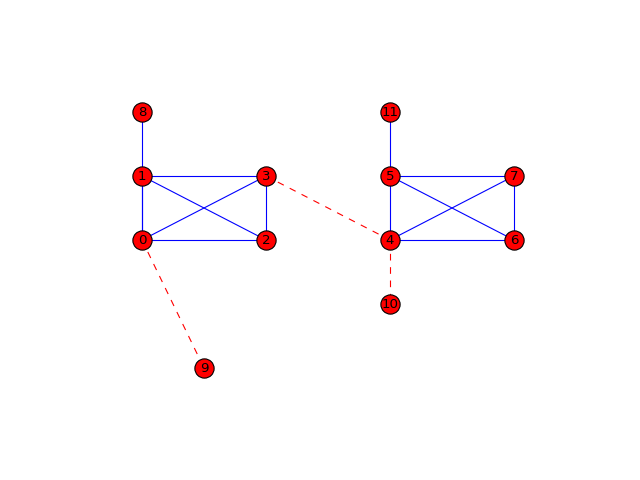

In [88]:
fig, ax = get_borderless_fig()
pos = {
    0: [0, 0], 1: [0, 1], 2: [1, 0], 3: [1, 1],
    4: [2, 0], 5: [2, 1], 6: [3, 0], 7: [3, 1],
    8: [0, 2], 9: [0.5, -2], 10: [2, -1], 11: [2, 2]
}
draw_nodes(g, pos=pos, ax=ax)
draw_edges(g, pos=pos, ax=ax)



In [92]:
A = nx.adjacency_matrix(g, weight='sign')
L = signed_normalized_laplacian(A)
eig_val, eig_vec = eigs(L, k=1, which='SM')

<IPython.core.display.Javascript object>


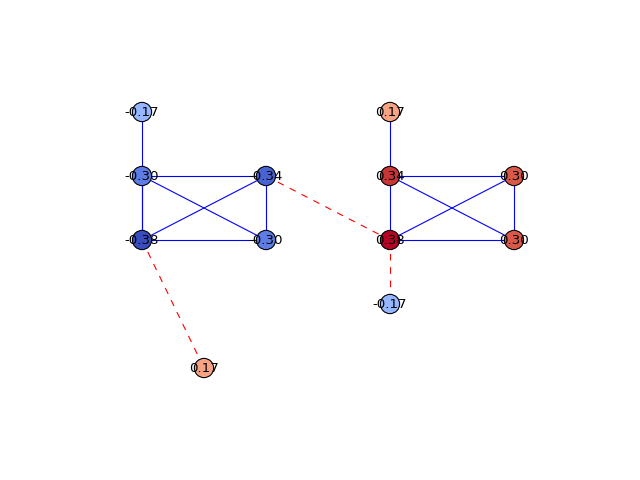

In [93]:
fig, ax = get_borderless_fig()

values = eig_vec.real.flatten()
labels = {i: '{:.2f}'.format(v) for i, v in enumerate(values)}

nx.draw_networkx_nodes(g, pos, node_color=values, node_size=300, cmap=plt.cm.coolwarm, ax=ax)
nx.draw_networkx_labels(g, pos, labels=labels, ax=ax, )
draw_edges(g, pos=pos, ax=ax)

